In [4]:
from sklearn.datasets import load_boston


In [5]:
boston=load_boston()
X=boston.data
y=boston.target

In [6]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
import pandas as pd 
df=pd.DataFrame(X)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# normalization according to colomns

In [10]:
import numpy as np
u=np.mean(X,axis=0)
sd=np.std(X,axis=0)
#print(u.shape,sd.shape)
X=(X-u)/sd

In [11]:
#Normalised data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


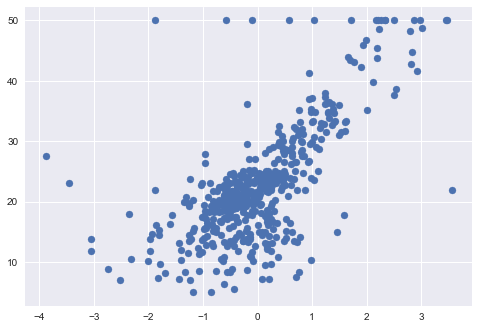

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(X[:,5],y)
plt.show()

In [23]:
#algoritham
def hypothisis(X,theta):
    y_=0.0
    for i in range(X.shape[0]):
        y_+=(theta[i]*X[i])
    return y_

def error(X,Y,theta):
    err=0.0
    for i in range(X.shape[0]):
        y_=hypothisis(X[i],theta)
        err+=((Y[i]-y_)**2)
    return err/X.shape[0]

def gradient(X,Y,theta):
    m,n=X.shape
    grad=np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_=hypothisis(X[i],theta)
            grad[j]+=(y_-Y[i])*X[i][j]
    return grad/m

def GradientDesicent(X,Y,learning_rate=0.1,max_epochs=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_epochs):
        e=error(X,Y,theta)
        error_list.append(e)
        grad=gradient(X,Y,theta)
        for i in range(n):
            theta[i]=theta[i]-learning_rate*grad[i]
    return theta,error_list

In [29]:
import time
start=time.time()
theta,error_list=GradientDesicent(X,y)
end=time.time()
print("time:{}".format(end-start))

time:20.078463315963745


In [27]:
pd.DataFrame(theta)

,0
0,-0.903092
1,1.038156
2,0.015348
3,0.699555
4,-2.021017
5,2.700143
6,-0.001931
7,-3.102348
8,2.343548
9,-1.720315


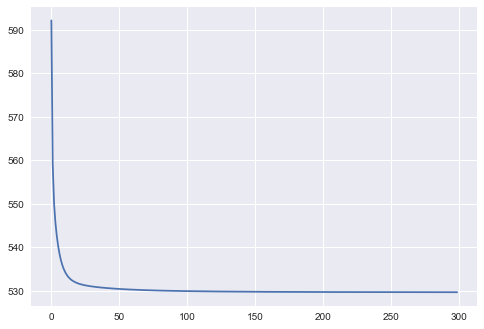

In [28]:
plt.plot(error_list)
plt.show()

In [30]:
y_=[]
for i in range(X.shape[0]):
    pred=hypothisis(X[i],theta)
    y_.append(pred)
y_=np.array(y_)

In [31]:
y_

array([ 7.65353062e+00,  2.45814851e+00,  8.03287465e+00,  6.08920628e+00,
        5.42914007e+00,  2.71172200e+00,  4.33012990e-01, -3.03689513e+00,
       -1.10524865e+01, -3.65397048e+00, -3.56150748e+00, -9.92411797e-01,
       -1.63995306e+00, -2.93152484e+00, -3.20913239e+00, -3.18693772e+00,
       -1.93447903e+00, -5.57496839e+00, -6.29786751e+00, -4.08731779e+00,
       -9.97801172e+00, -4.82355210e+00, -6.64733589e+00, -8.69090189e+00,
       -6.81709685e+00, -9.11225552e+00, -7.03505274e+00, -7.77462391e+00,
       -2.93324720e+00, -1.59302950e+00, -1.10353554e+01, -4.43918997e+00,
       -1.36497959e+01, -8.21670410e+00, -8.77297000e+00,  1.24450319e+00,
       -2.22916915e-01,  5.54916114e-01,  3.76599122e-01,  8.74281885e+00,
        1.16165393e+01,  5.45870082e+00,  2.61880475e+00,  2.02914589e+00,
        3.33850897e-01, -5.19809335e-01, -2.18200638e+00, -4.59040868e+00,
       -1.35295704e+01, -5.42321319e+00, -1.36817574e+00,  1.30768787e+00,
        5.03039366e+00,  

In [36]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    return (1-num/denom)*10

print(r2_score(y_,y))

-75.00884934789751


# optimisation your code using vectorization

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def hypothisis(X,theta):
    return np.dot(X,theta)

def error(X,Y,theta):
    e=0.0
    m=X.shape[0]
    y_=hypothisis(X,theta)
    e=np.sum((Y-y_)**2)
    return e/m

def gradient(X,Y,theta):
    y_=hypothisis(X,theta)
    grad=np.dot(X.T,(y_-Y))
    m=X.shape[0]
    return grad/m

def gradientdecent(X,y,learning_rate=0.1,max_iter=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_iter):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
    

In [22]:
import time
start=time.time()
theta,error_list=gradientdecent(X,y)
end=time.time()
print("time:{}".format(end-start))

time:0.02094411849975586


In [23]:
theta

array([-9.03091692e-01,  1.03815625e+00,  1.53477685e-02,  6.99554920e-01,
       -2.02101672e+00,  2.70014278e+00, -1.93085233e-03, -3.10234837e+00,
        2.34354753e+00, -1.72031485e+00, -2.04614394e+00,  8.47845679e-01,
       -3.73089521e+00])

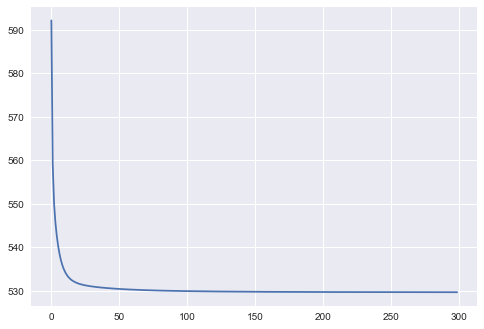

In [25]:
plt.plot(error_list)
plt.show()

In [26]:
y_=hypothisis(X,theta)
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    return (1-num/denom)*10

print(r2_score(y_,y))

-75.00884934789752
